#Reyes Guerrero Luis Benjamin
# Tarea S3
# NRC: 4243

Visualización del .text

In [17]:
import pandas as pd
# Cargar el archivo .txt (cambia el delimitador si es necesario)
df = pd.read_csv('Hospital_Records.txt', delimiter=',')
# Visualizar las primeras 5 filas del DataFrame
# print(df.head())
# Mostrar todo el contenido del DataFrame
print(df.to_string())  # to_string() se utiliza para mostrar todos los datos sin truncarlos



     ID Nombre del Paciente Fecha de Ingreso Fecha de Alta  Días de Hospitalización  Costo Total (USD)
0     1          Juan Perez       2023-07-10    2023-07-20                       10               5000
1     2         Maria Lopez       2023-06-15    2023-06-25                       10               4800
2     3       Carlos Torres       2023-05-01    2023-05-01                        0              10000
3     4            Ana Rios       2022/12/10    2022/12/30                       20              -3000
4     5          Pedro Diaz       2024-08-20    2024-08-22                        2                600
5     6          Sofia Cruz       2024-02-29    2024-03-02                        2               1500
6     7          Juan Perez       2023-07-10    2023-07-20                       10               5000
7     8     Luisa Fernandez       2024-01-01    2024-01-15                       14               8000
8     9      Fernando Perez       2024-09-05    2025-08-10               

1.-Cargar el archivo y verificar los tipos de datos

In [14]:
import pandas as pd
# Verificar los tipos de datos cargados
print(df.dtypes)

ID                          int64
Nombre del Paciente        object
Fecha de Ingreso           object
Fecha de Alta              object
Días de Hospitalización     int64
Costo Total (USD)           int64
dtype: object


2.-Convertir columnas a formato numérico y manejar errores
"Algunas columnas como "Días de Hospitalización" y "Costo Total (USD)" podrían no estar en formato numérico, así que vamos a forzar la conversión."

In [7]:
# Convertir columnas relevantes a numéricas, manejando errores
df['Días de Hospitalización'] = pd.to_numeric(df['Días de Hospitalización'], errors='coerce')
df['Costo Total (USD)'] = pd.to_numeric(df['Costo Total (USD)'], errors='coerce')

# Verificar si hay valores nulos después de la conversión
print(df[['Días de Hospitalización', 'Costo Total (USD)']].isnull().sum())




Días de Hospitalización    0
Costo Total (USD)          0
dtype: int64


3.-Calcular estadísticas (media, mediana, desviación estándar)
"Ahora que las columnas están en formato numérico, ya podemos calcular las estadísticas"

In [9]:
import numpy as np

# Obtener las columnas numéricas
numeric_cols = df[['Días de Hospitalización', 'Costo Total (USD)']]

# Calcular estadísticas
mean_values = numeric_cols.mean()
median_values = numeric_cols.median()
std_values = numeric_cols.std()

# Crear un DataFrame con las estadísticas
stats_df = pd.DataFrame({
    'Media': mean_values,
    'Mediana': median_values,
    'Deviación Estandar': std_values
})

# Imprimir las estadísticas
print(stats_df)

# Guardar estadísticas en un archivo
stats_df.to_csv('estadisticas.txt', sep='\t')



                          Media  Mediana  Deviación Estandar
Días de Hospitalización    29.4      5.0          143.989127
Costo Total (USD)        4807.0   3000.0        10591.785029


4.-Crear los histogramas
"Ahora podremos generar los histogramas para visualizar las distribuciones"

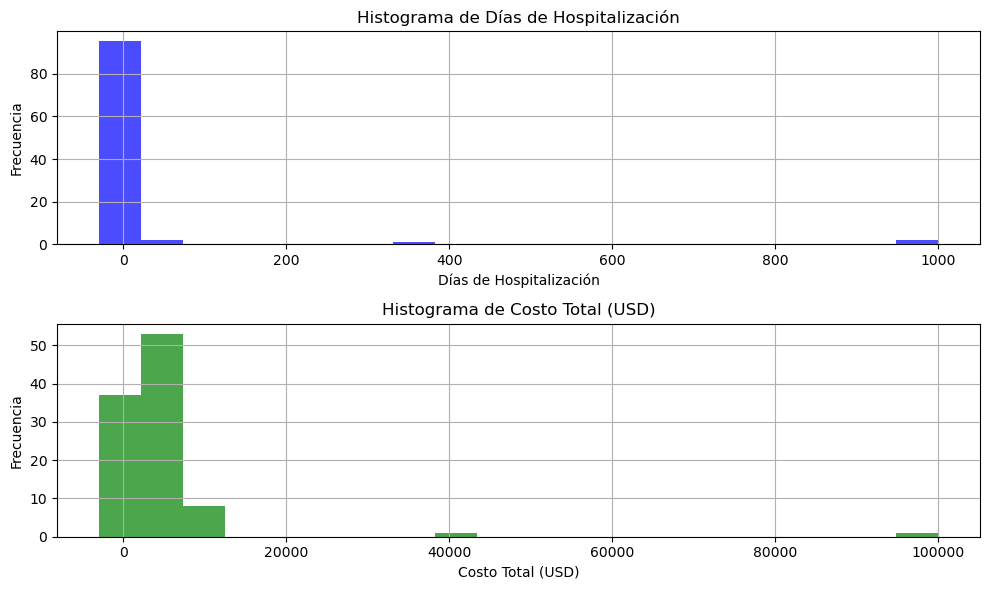

In [10]:
# Solución
import matplotlib.pyplot as plt

# Crear un gráfico con dos histogramas
plt.figure(figsize=(10, 6))

# Primer histograma: Días de Hospitalización
plt.subplot(2, 1, 1)
df['Días de Hospitalización'].dropna().hist(bins=20, color='blue', alpha=0.7)
plt.title('Histograma de Días de Hospitalización')
plt.xlabel('Días de Hospitalización')
plt.ylabel('Frecuencia')

# Segundo histograma: Costo Total (USD)
plt.subplot(2, 1, 2)
df['Costo Total (USD)'].dropna().hist(bins=20, color='green', alpha=0.7)
plt.title('Histograma de Costo Total (USD)')
plt.xlabel('Costo Total (USD)')
plt.ylabel('Frecuencia')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()
